# Breast Cancer Survival Prediction Data wrangling




In this notebook we will load, define and clean the data loaded from https://ieee-dataport.org/open-access/seer-breast-cancer-data#files

In [1]:
#import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sklearn packages
from sklearn import preprocessing

from pandas_profiling import ProfileReport

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# !ls "/content/drive/My Drive/Springbaord/capston 2 project/data"

### 1-1: Data collection 

In [12]:
#load the dataset
file_name = '/content/drive/My Drive/Springbaord/capston 2 project/data/SEER_Breast_Cancer_Dataset.csv'
df_raw = pd.read_csv(file_name)

In [13]:
#display the sample of data
df_raw.head()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


In [15]:
#get the summary of data
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

In [16]:
#drop the empty column 
df_raw.drop(columns = ['Unnamed: 3'], inplace = True)

In [17]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A Stage                 4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   object
 10  Progesterone Status     4024 non-null   object
 11  Regional Node Examined  4024 non-null   int64 
 12  Reginol Node Positive   4024 non-null   int64 
 13  Survival Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
dtypes: i

In [18]:
#confirm there is no missing data
missing = pd.concat([df_raw.isnull().sum(axis=1), 100 * df_raw.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing['%'].unique()

array([0.])

### 1-2: Data Definition 

As seen in the info above, there are 10 categorical columns and 5 numerical columns.
There seems to be no null value for all the records.


To be abale to do proper statical analysis we are going to convert the categorical columns to numberical data

In [19]:
#check the columns name 
df_raw.columns

Index(['Age', 'Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [20]:
#fix "Race" and "T Stage" column name and remove the space 
df = df_raw.rename(columns={'Race ':'Race','T Stage ':'T Stage'})

In [21]:
#all the columns with object datatype 
objetc_columns = df.dtypes[df.dtypes == object]
objetc_columns.index

Index(['Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage', 'Grade',
       'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status'],
      dtype='object')

### 1-3: Data Cleaning

In [22]:
features = list(objetc_columns.index)

In [23]:
# Encode Categorical Columns
le = preprocessing.LabelEncoder()
df_numerical = df.copy()
df_numerical[features] = df_numerical[features].apply(le.fit_transform)

In [24]:
df_numerical.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,1,1,1,2,4,0,1,40,1,1,19,11,1,0
1,47,1,1,1,1,2,0,1,45,1,1,25,9,2,0
2,67,2,1,1,0,1,1,1,25,1,1,4,1,2,1
3,46,2,0,0,0,0,0,1,19,1,1,26,1,2,1
4,63,2,1,1,1,2,0,1,35,1,1,21,5,3,1


In [25]:
pd.get_dummies(df_numerical['Race'])

,0,1,2
0,0,1,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
4019,0,0,1
4020,0,0,1
4021,0,0,1
4022,0,1,0


In [26]:
#confirm all the categorical data are converted to numberical data types
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4024 non-null   int64
 1   Race                    4024 non-null   int64
 2   Marital Status          4024 non-null   int64
 3   T Stage                 4024 non-null   int64
 4   N Stage                 4024 non-null   int64
 5   6th Stage               4024 non-null   int64
 6   Grade                   4024 non-null   int64
 7   A Stage                 4024 non-null   int64
 8   Tumor Size              4024 non-null   int64
 9   Estrogen Status         4024 non-null   int64
 10  Progesterone Status     4024 non-null   int64
 11  Regional Node Examined  4024 non-null   int64
 12  Reginol Node Positive   4024 non-null   int64
 13  Survival Months         4024 non-null   int64
 14  Status                  4024 non-null   int64
dtypes: int64(15)
memory u

In [27]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4024.0,53.972167,8.963134,30.0,47.0,54.0,61.0,69.0
Race,4024.0,1.775845,0.564465,0.0,2.0,2.0,2.0,2.0
Marital Status,4024.0,1.371272,1.063637,0.0,1.0,1.0,1.0,4.0
T Stage,4024.0,0.784791,0.765531,0.0,0.0,1.0,1.0,3.0
N Stage,4024.0,0.438370,0.693479,0.0,0.0,0.0,1.0,2.0
6th Stage,4024.0,1.321819,1.266624,0.0,0.0,1.0,2.0,4.0
Grade,4024.0,0.690358,1.016418,0.0,0.0,0.0,1.0,3.0
A Stage,4024.0,0.977137,0.149485,0.0,1.0,1.0,1.0,1.0
Tumor Size,4024.0,30.473658,21.119696,1.0,16.0,25.0,38.0,140.0
Estrogen Status,4024.0,0.933151,0.249791,0.0,1.0,1.0,1.0,1.0


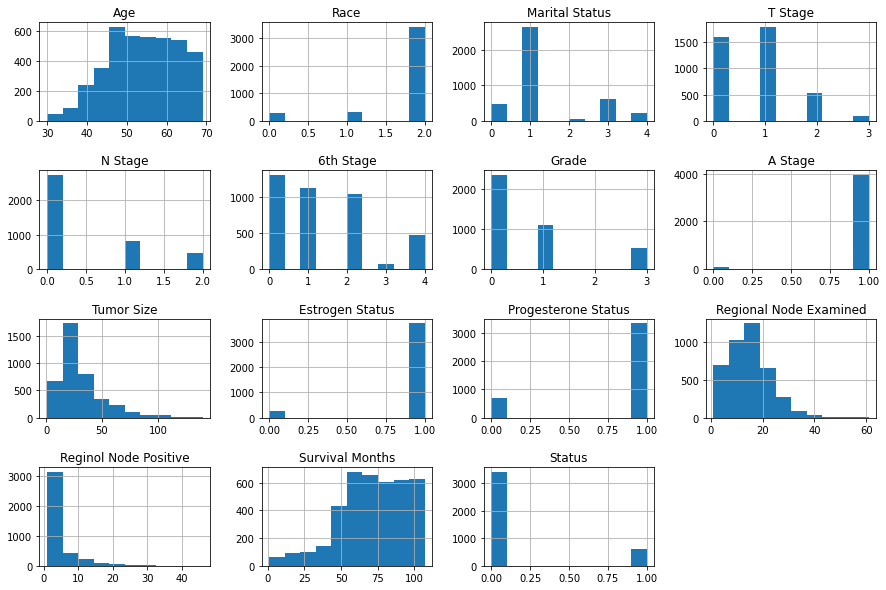

In [28]:
#Plot distributions of features
df_numerical.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);


Summary for: "Race"
   count      %
2   3413  84.82
1    320   7.95
0    291   7.23




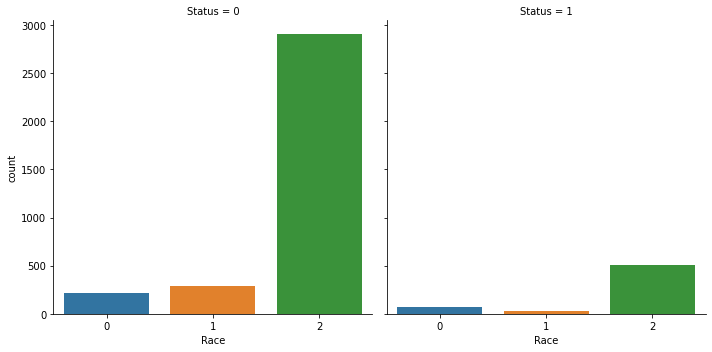

________________________________________________________________________________________________________
Summary for: "Marital Status"
   count      %
1   2643  65.68
3    615  15.28
0    486  12.08
4    235   5.84
2     45   1.12




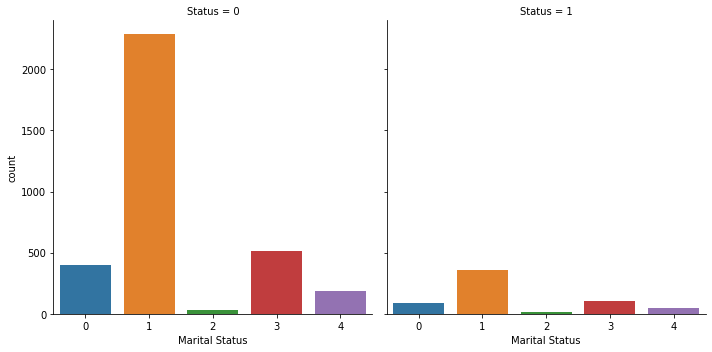

________________________________________________________________________________________________________
Summary for: "T Stage"
   count      %
1   1786  44.38
0   1603  39.84
2    533  13.25
3    102   2.53




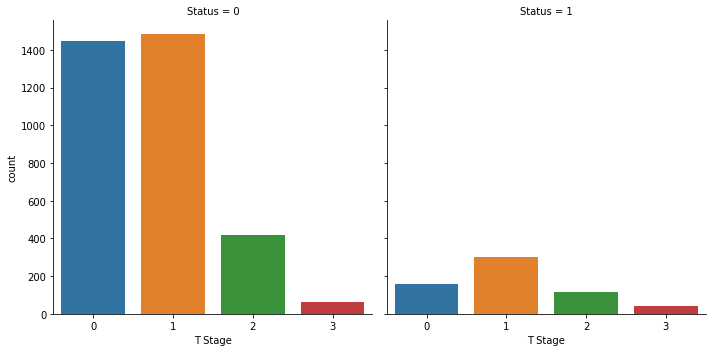

________________________________________________________________________________________________________
Summary for: "N Stage"
   count      %
0   2732  67.89
1    820  20.38
2    472  11.73




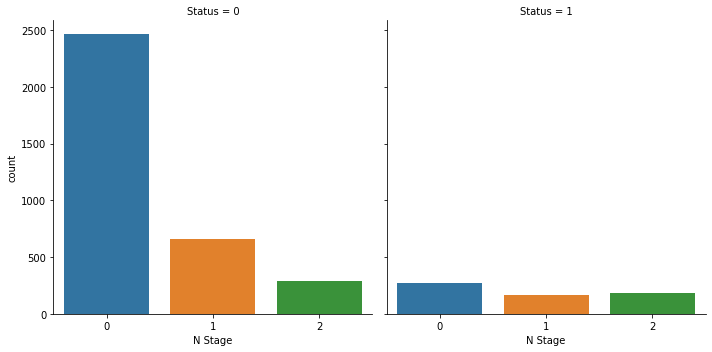

________________________________________________________________________________________________________
Summary for: "6th Stage"
   count      %
0   1305  32.43
1   1130  28.08
2   1050  26.09
4    472  11.73
3     67   1.67




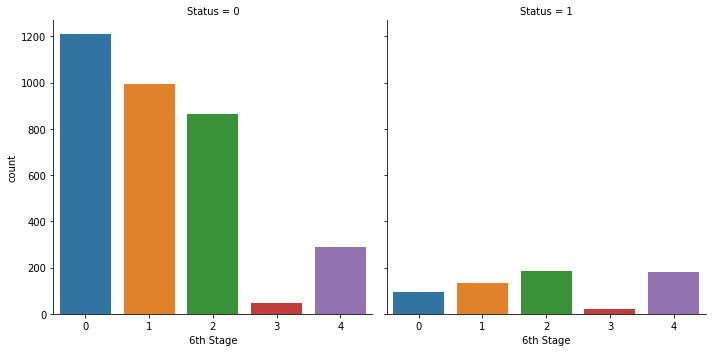

________________________________________________________________________________________________________
Summary for: "Grade"
   count      %
0   2351  58.42
1   1111  27.61
3    543  13.49
2     19   0.47




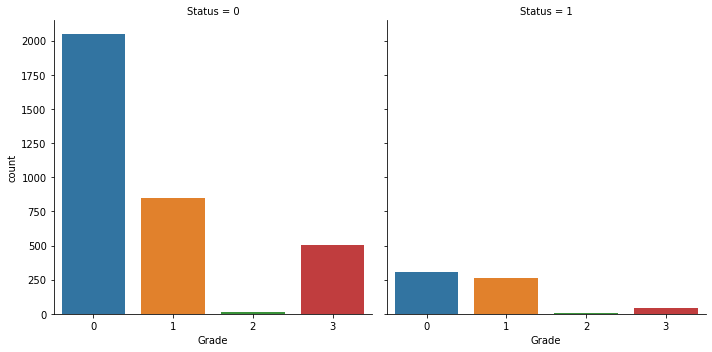

________________________________________________________________________________________________________
Summary for: "A Stage"
   count      %
1   3932  97.71
0     92   2.29




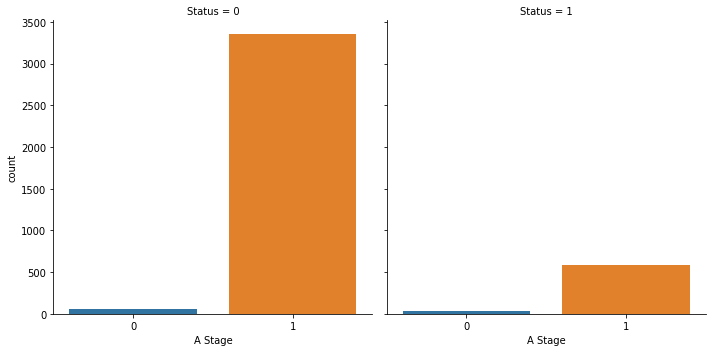

________________________________________________________________________________________________________
Summary for: "Estrogen Status"
   count      %
1   3755  93.32
0    269   6.68




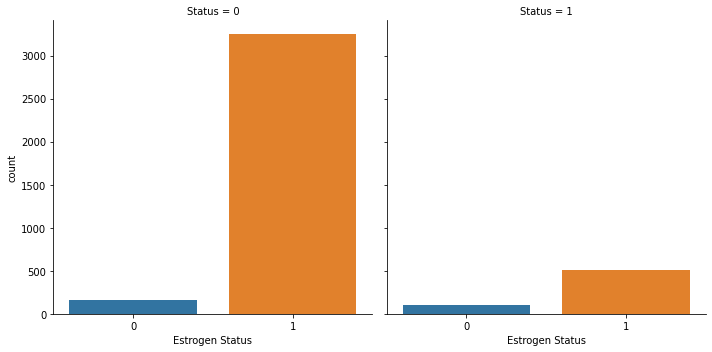

________________________________________________________________________________________________________
Summary for: "Progesterone Status"
   count      %
1   3326  82.65
0    698  17.35




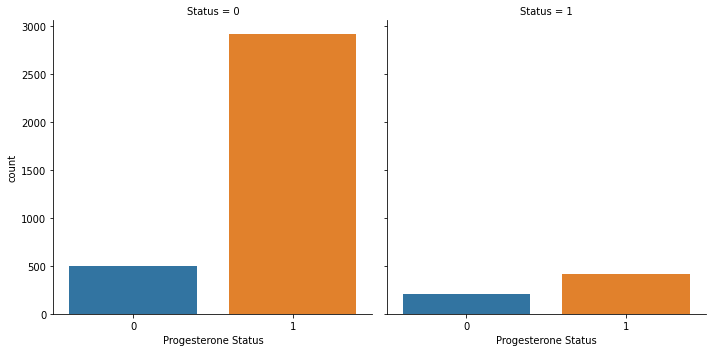

________________________________________________________________________________________________________
Summary for: "Status"
   count      %
0   3408  84.69
1    616  15.31




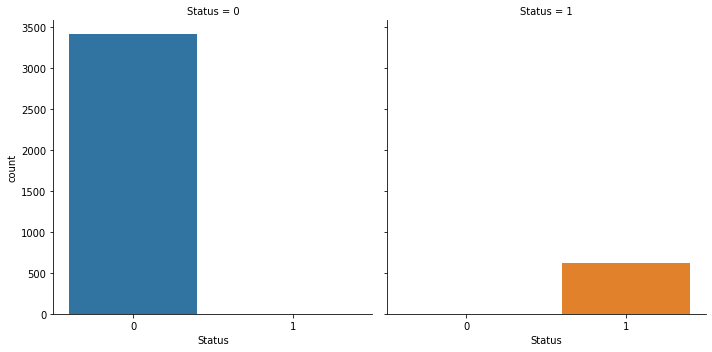

________________________________________________________________________________________________________


In [29]:
#exploring the summary of all the features after combined with synthetic data
get_summary(df_numerical,['Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage', 'Grade',
       'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status'])

After analyzing the data and all the features and records, it seems the data set is ready for exploratory data analysing, therefore we will save the data for more investigation.

In [31]:
fpath = '/content/drive/My Drive/Springbaord/capston 2 project/data/bc_data_cleaned.csv'
df_numerical.to_csv(fpath, index=False)

## As the data is imbalanced, synthetic data has been created and data is update as below

In [34]:
fpath = '/content/drive/My Drive/Springbaord/capston 2 project/data/bc_data_synthetic.csv'
df_synth= pd.read_csv(fpath)

In [35]:
df_synth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6816 entries, 0 to 6815
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     6816 non-null   int64
 1   Race                    6816 non-null   int64
 2   Marital Status          6816 non-null   int64
 3   T Stage                 6816 non-null   int64
 4   N Stage                 6816 non-null   int64
 5   6th Stage               6816 non-null   int64
 6   Grade                   6816 non-null   int64
 7   A Stage                 6816 non-null   int64
 8   Tumor Size              6816 non-null   int64
 9   Estrogen Status         6816 non-null   int64
 10  Progesterone Status     6816 non-null   int64
 11  Regional Node Examined  6816 non-null   int64
 12  Reginol Node Positive   6816 non-null   int64
 13  Survival Months         6816 non-null   int64
 14  Status                  6816 non-null   int64
dtypes: int64(15)
memory u

Summary for: "Race"
   count      %
2   5368  78.76
1    802  11.77
0    646   9.48




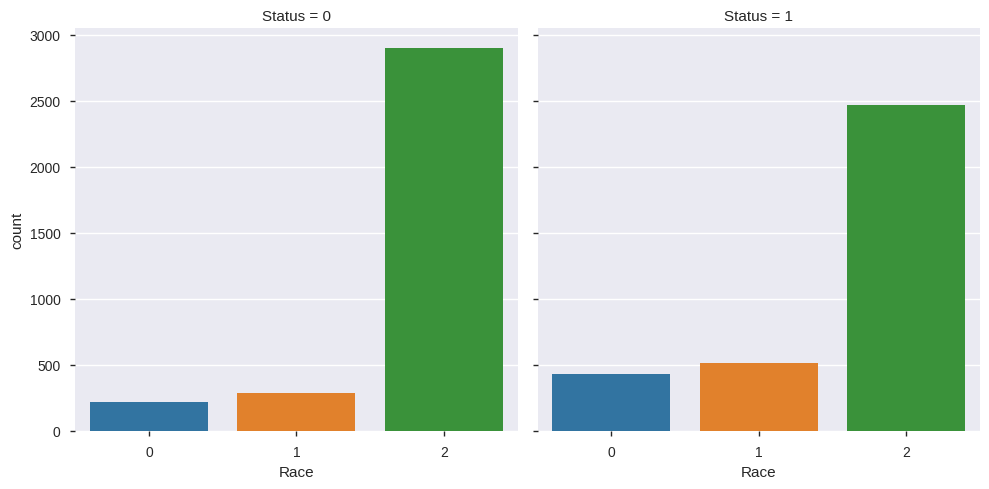

________________________________________________________________________________________________________
Summary for: "Marital Status"
   count      %
1   4152  60.92
0   1100  16.14
3    846  12.41
2    448   6.57
4    270   3.96




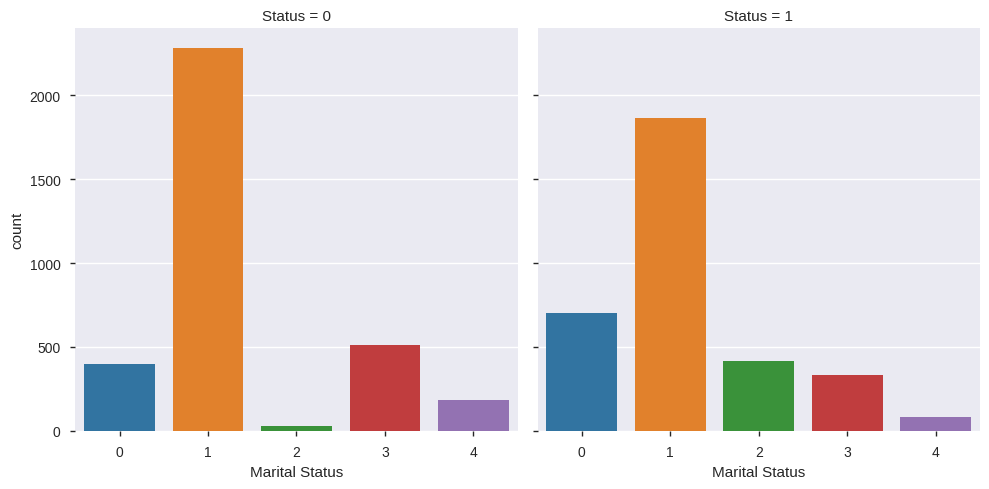

________________________________________________________________________________________________________
Summary for: "T Stage"
   count      %
1   3083  45.23
0   2454  36.00
2   1144  16.78
3    135   1.98




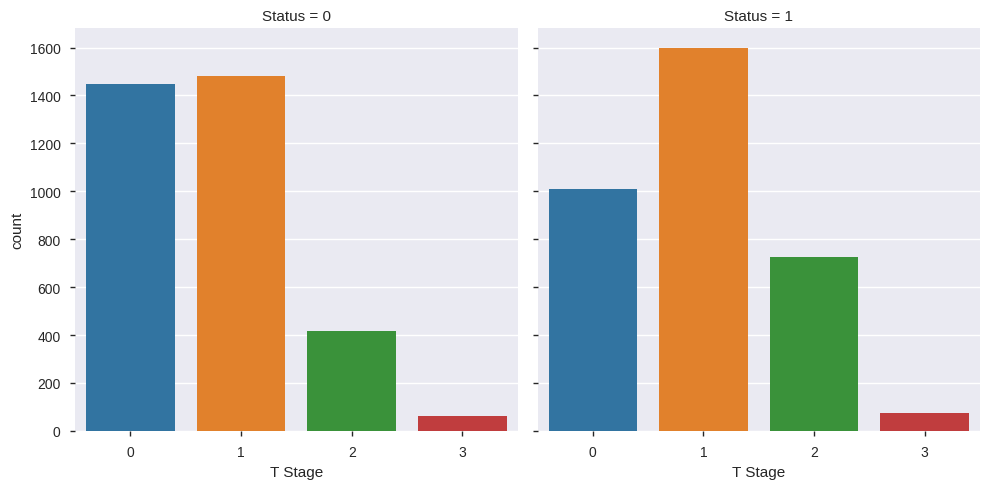

________________________________________________________________________________________________________
Summary for: "N Stage"
   count      %
0   4246  62.29
1   1536  22.54
2   1034  15.17




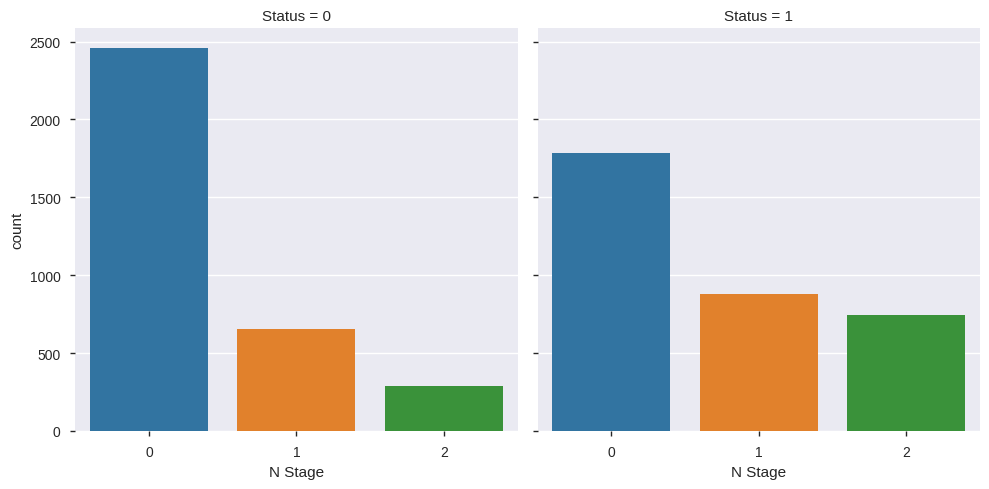

________________________________________________________________________________________________________
Summary for: "6th Stage"
   count      %
1   1892  27.76
0   1816  26.64
2   1752  25.70
4   1034  15.17
3    322   4.72




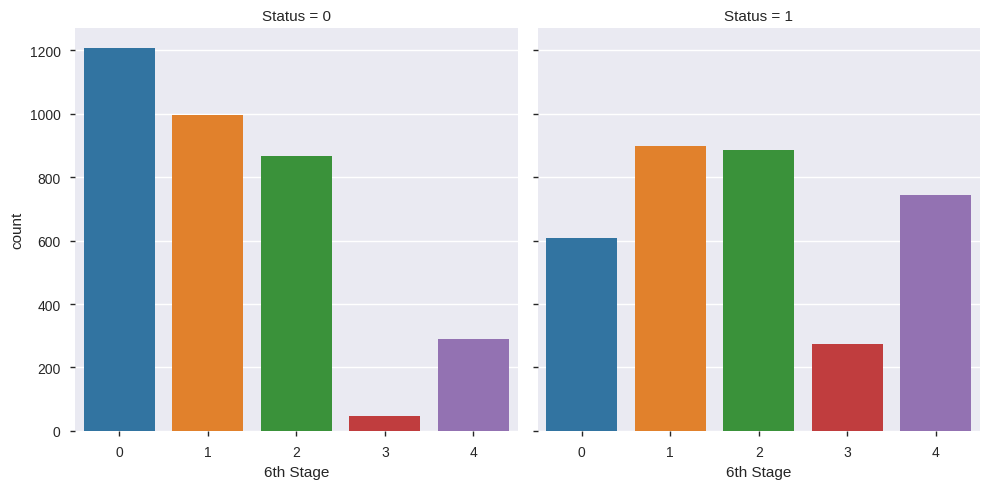

________________________________________________________________________________________________________
Summary for: "Grade"
   count      %
0   4284  62.85
1   1821  26.72
3    557   8.17
2    154   2.26




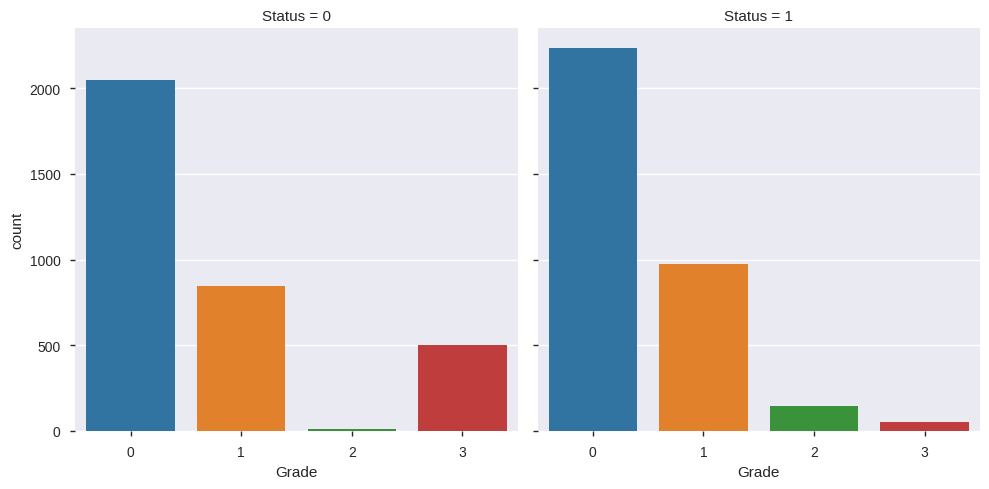

________________________________________________________________________________________________________
Summary for: "A Stage"
   count      %
1   6452  94.66
0    364   5.34




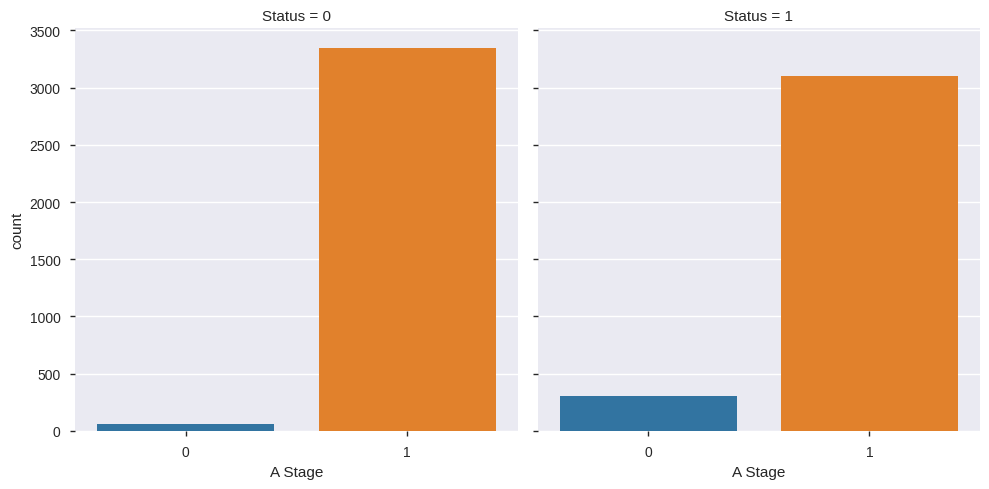

________________________________________________________________________________________________________
Summary for: "Estrogen Status"
   count      %
1   5769  84.64
0   1047  15.36




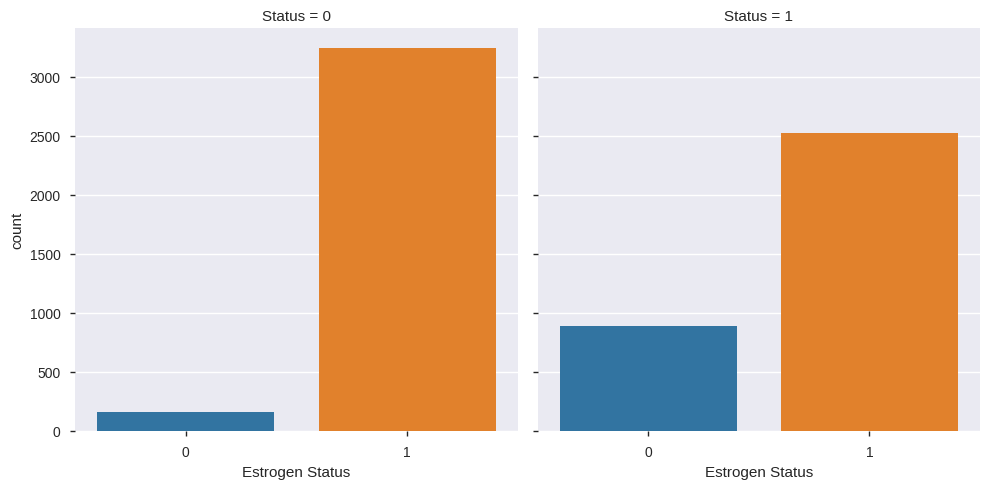

________________________________________________________________________________________________________
Summary for: "Progesterone Status"
   count      %
1   4666  68.46
0   2150  31.54




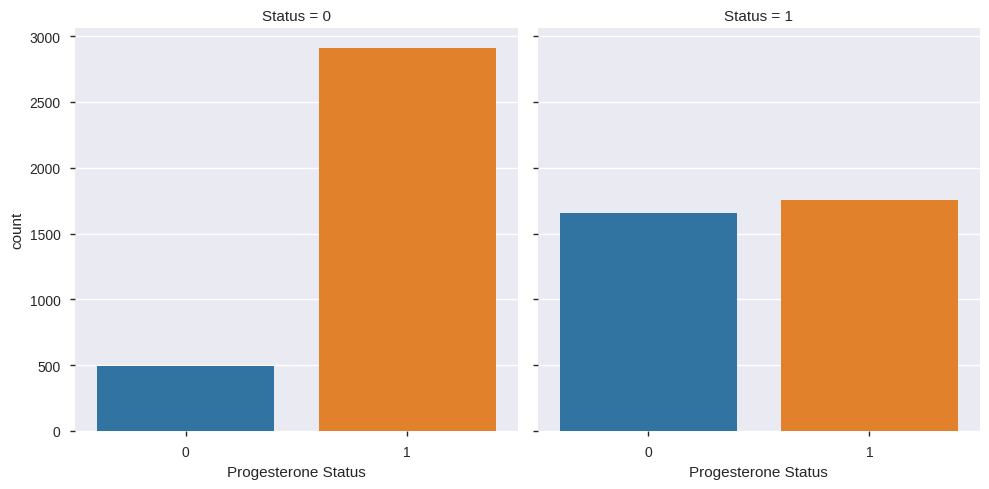

________________________________________________________________________________________________________
Summary for: "Status"
   count     %
1   3408  50.0
0   3408  50.0




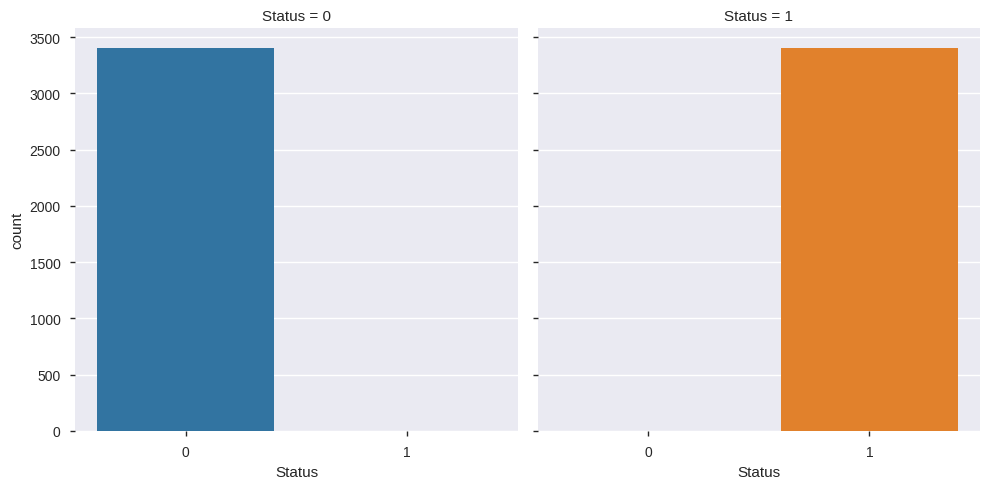

________________________________________________________________________________________________________


In [36]:
#exploring the summary of all the features after combined with synthetic data
get_summary(df_synth,['Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage', 'Grade',
       'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status'])

As seen in the above graphs the data has been balanced correctly.

In [14]:
#functions

#function to get the unique values for each featur
def get_summary(df,features):
    for entry in features:
        print('Summary for: "' + entry + '"')
        output = pd.DataFrame({'count':df[entry].value_counts()})
        output['%'] = round(100* (output['count']/len(df[entry])),2)
        print(output)
        print('\n')
        sns.catplot(x=entry,data=df,kind="count",col = "Status")
        #plt.xticks(rotation=90)
        plt.show()
        print('________________________________________________________________________________________________________')


